**<center>Build A Knowledge Graph </center>**





**VISHNU BALACHANDRAN**

**AM.EN.P2ARI20040**

**AI DEPARTMENT**

---









In [1]:
 !python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.1MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp37-none-any.whl size=829180944 sha256=c95392042cc73343af9ebed9e9d2408349ff8c61b37462d1323172d8ffa0460d
  Stored in directory: /tmp/pip-ephem-wheel-cache-7zsni3nw/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [2]:
from googlesearch import search

In [3]:
query=input("What exactly do you want to look for?")

What exactly do you want to look for?photonics


In [4]:
urls = []
for url in search(query, 
                  tld="com", 
                  num=20, 
                  stop=20, 
                  pause=2):
    urls.append(url)
print('Search Results:')
for idx, url in enumerate(urls):
    print(idx + 1, url)

Search Results:
1 https://www.photonics.com/
2 https://www.photonics.com/Webinars.aspx
3 https://www.photonics.com/Photonics_Spectra/p5
4 https://www.photonics.com/Subscriptions/Subscribe.aspx
5 https://www.photonics.com/EDU/
6 https://en.wikipedia.org/wiki/Photonics
7 https://en.wikipedia.org/wiki/Silicon_photonics
8 https://en.wikipedia.org/wiki/Microphotonics
9 https://en.wikipedia.org/wiki/Photonics_mast
10 https://en.wikipedia.org/wiki/Organic_photonics
11 https://www.wxxinews.org/post/aim-photonics-names-new-chair-and-awaits-news-about-future-funding
12 https://testmeasurement.com.au/news/80399/photonics-market-to-witness-rapid-growth-by-2027-ii-viinc-hoya-corporation-ohara-inc/
13 https://www.nextplatform.com/2021/05/07/globalfoundries-sharpens-photonics-edge-for-quantum-manufacturing/
14 http://www.op-tec.org/what-is-photonics
15 https://www.mdpi.com/journal/photonics
16 https://www.nature.com/nphoton/
17 https://www.light2015.org/Home/WhyLightMatters/What-is-Photonics.html
18 

In [5]:
pip install py2neo

     |████████████████████████████████| 204kB 6.4MB/s 
     |████████████████████████████████| 153kB 8.5MB/s 
     |████████████████████████████████| 3.2MB 8.9MB/s 
     |████████████████████████████████| 368kB 43.2MB/s 
     |████████████████████████████████| 71kB 7.7MB/s 
  Created wheel for neotime: filename=neotime-1.7.4-cp37-none-any.whl size=20541 sha256=6f68c18aaad0878903484957fded2018384218925f24b47276aa6af5c318e79b
  Stored in directory: /root/.cache/pip/wheels/d4/b4/c4/ab867cd0ac9e667f8cd269f9364fd1cb8ee75fe50f5ce97c79
Successfully built neotime
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 3.0.18 which is incompatible.
ERROR: ipython 5.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.4, but you'll have prompt-toolkit 3.0.18 which is incompatible.
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18


In [6]:
pip install html2text

In [7]:
import spacy
from spacy.matcher import Matcher 

from pathlib import Path

import pandas as pd
import re
import requests, bs4
import html2text

from py2neo import Graph

from googlesearch import search

import itertools

from tqdm import tqdm
# Instantly make your loops show a smart progress meter - 
# just wrap any iterable with tqdm(iterable), and you’re done!

In [9]:
path = Path("Converted_Pages")
path.mkdir(exist_ok=True)

**Extract the text from the web pages and store in text documents**

In [10]:
converted_pages = []
converted_page_count = 0

for url in tqdm(urls):
    
    print('\nRoot URL: ', url)
    
    linked_urls = []
    
    try:
    
        res = requests.get(url, timeout=50)
        responseSoup = bs4.BeautifulSoup(res.text,"lxml")
        count_a = len(responseSoup.find_all('a', href=True))
        limit = min(5, count_a)  
        
        if limit > 0:
        
            for a in responseSoup.find_all('a', href=True):

                if (a['href'].find('www.') == -1) and (a['href'].find('https://') ==-1):

                    embedded_url = f"{url}{a['href']}"
                    linked_urls.append(embedded_url)

                else:
                    linked_urls.append(a['href'])

                if len(linked_urls) == limit:
                    break
    
        linked_urls.append(url)
        
        linked_urls = list(set(linked_urls))
        
        print('Related URLs crawled:')

        for idx, linked_url in enumerate(linked_urls):
            
            print(idx + 1, linked_url)

            try:
                r = requests.get(linked_url)
                html = r.text
                text = html2text.html2text(html)
                text = re.sub(r'[^a-zA-Z. ]', ' ', text)
                text = re.sub(r'\b\w{1,3}\b', '', text)
                text = re.sub('\s+',' ', text)

                #Create a file and save the text

                with open(f"Converted_Pages/Page_{converted_page_count}.txt",'w', encoding = 'utf-8') as f:
                    f.write(text) 
                    
                converted_page_count += 1

            except Exception as ex:
                print(type(ex))
                print(linked_url)
        
    except Exception as ex:
        print(type(ex))
        print(url)

  0%|          | 0/20 [00:00<?, ?it/s]


Root URL:  https://www.photonics.com/
Related URLs crawled:
1 https://www.photonics.com//BuyersGuide.aspx
2 https://www.photonics.com//
3 https://www.photonics.com//Member/Default.aspx
4 https://www.photonics.com/#
5 https://www.photonics.com/
6 https://www.photonics.com//Member/Login.aspx


  5%|▌         | 1/20 [00:02<00:50,  2.68s/it]


Root URL:  https://www.photonics.com/Webinars.aspx
Related URLs crawled:
1 https://www.photonics.com/Webinars.aspx/Member/Default.aspx
2 https://www.photonics.com/Webinars.aspx/BuyersGuide.aspx
3 https://www.photonics.com/Webinars.aspx/Member/Login.aspx
4 https://www.photonics.com/Webinars.aspx
5 https://www.photonics.com/Webinars.aspx#
6 https://www.photonics.com/Webinars.aspx/


 10%|█         | 2/20 [00:07<00:59,  3.31s/it]


Root URL:  https://www.photonics.com/Photonics_Spectra/p5
Related URLs crawled:
1 https://www.photonics.com/Photonics_Spectra/p5/
2 https://www.photonics.com/Photonics_Spectra/p5
3 https://www.photonics.com/Photonics_Spectra/p5/Member/Default.aspx
4 https://www.photonics.com/Photonics_Spectra/p5/Member/Login.aspx
5 https://www.photonics.com/Photonics_Spectra/p5/BuyersGuide.aspx
6 https://www.photonics.com/Photonics_Spectra/p5#


 15%|█▌        | 3/20 [00:12<01:06,  3.91s/it]


Root URL:  https://www.photonics.com/Subscriptions/Subscribe.aspx
Related URLs crawled:
1 https://www.photonics.com/Subscriptions/Subscribe.aspx#
2 https://www.photonics.com/Subscriptions/Subscribe.aspx/Member/Login.aspx
3 https://www.photonics.com/Subscriptions/Subscribe.aspx
4 https://www.photonics.com/Subscriptions/Subscribe.aspx/Member/Default.aspx
5 https://www.photonics.com/Subscriptions/Subscribe.aspx/
6 https://www.photonics.com/Subscriptions/Subscribe.aspx/BuyersGuide.aspx


 20%|██        | 4/20 [00:15<00:55,  3.47s/it]


Root URL:  https://www.photonics.com/EDU/
Related URLs crawled:
1 https://www.photonics.com/EDU//BuyersGuide.aspx
2 https://www.photonics.com/EDU/#
3 https://www.photonics.com/EDU//
4 https://www.photonics.com/EDU/
5 https://www.photonics.com/EDU//Member/Default.aspx
6 https://www.photonics.com/EDU//Member/Login.aspx


 25%|██▌       | 5/20 [00:18<00:49,  3.32s/it]


Root URL:  https://en.wikipedia.org/wiki/Photonics
Related URLs crawled:
1 https://en.wikipedia.org/wiki/Photonics#mw-head
2 https://en.wikipedia.org/wiki/Photonics#searchInput
3 https://en.wikipedia.org/wiki/Photonics
4 https://en.wikipedia.org/w/index.php?title=Photonics&action=edit
5 https://en.wikipedia.org/wiki/Photonics/wiki/Wikipedia:Verifiability
6 https://en.wikipedia.org/wiki/Photonics/wiki/File:Question_book-new.svg


 30%|███       | 6/20 [00:20<00:41,  2.97s/it]


Root URL:  https://en.wikipedia.org/wiki/Silicon_photonics
Related URLs crawled:
1 https://en.wikipedia.org/wiki/Silicon_photonics#mw-head
2 https://en.wikipedia.org/wiki/Silicon_photonics#searchInput
3 https://en.wikipedia.org/wiki/Silicon_photonics/wiki/Photonics
4 https://en.wikipedia.org/wiki/Silicon_photonics/wiki/Optical_medium
5 https://en.wikipedia.org/wiki/Silicon_photonics
6 https://en.wikipedia.org/wiki/Silicon_photonics/wiki/Silicon


 35%|███▌      | 7/20 [00:22<00:35,  2.70s/it]


Root URL:  https://en.wikipedia.org/wiki/Microphotonics
Related URLs crawled:
1 https://en.wikipedia.org/w/index.php?title=Microphotonics&action=edit
2 https://en.wikipedia.org/wiki/Microphotonics/wiki/Wikipedia:Verifiability
3 https://en.wikipedia.org/wiki/Microphotonics#searchInput
4 https://en.wikipedia.org/wiki/Microphotonics#mw-head
5 https://en.wikipedia.org/wiki/Microphotonics/wiki/File:Question_book-new.svg


 40%|████      | 8/20 [00:24<00:28,  2.39s/it]

6 https://en.wikipedia.org/wiki/Microphotonics

Root URL:  https://en.wikipedia.org/wiki/Photonics_mast
Related URLs crawled:
1 https://en.wikipedia.org/wiki/Photonics_mast/wiki/Virginia-class_submarine
2 https://en.wikipedia.org/wiki/Photonics_mast/wiki/File:Photonics_Mast_Array_01.jpg
3 https://en.wikipedia.org/wiki/Photonics_mast
4 https://en.wikipedia.org/wiki/Photonics_mast#mw-head
5 https://en.wikipedia.org/wiki/Photonics_mast#searchInput


 45%|████▌     | 9/20 [00:25<00:22,  2.05s/it]


Root URL:  https://en.wikipedia.org/wiki/Organic_photonics
Related URLs crawled:
1 https://en.wikipedia.org/wiki/Organic_photonics/wiki/File:PMMA_repeating_unit.svg
2 https://en.wikipedia.org/wiki/Organic_photonics
3 https://en.wikipedia.org/wiki/Organic_photonics#mw-head
4 https://en.wikipedia.org/wiki/Organic_photonics/wiki/File:Rhodamine_6G.svg


 50%|█████     | 10/20 [00:26<00:18,  1.82s/it]

5 https://en.wikipedia.org/wiki/Organic_photonics#searchInput

Root URL:  https://www.wxxinews.org/post/aim-photonics-names-new-chair-and-awaits-news-about-future-funding
Related URLs crawled:
1 https://www.wxxinews.org/post/aim-photonics-names-new-chair-and-awaits-news-about-future-fundinghttp://bit.ly/wxxisupport20
2 https://www.wxxinews.org/post/aim-photonics-names-new-chair-and-awaits-news-about-future-funding
3 https://www.wxxinews.org/post/aim-photonics-names-new-chair-and-awaits-news-about-future-funding/


 55%|█████▌    | 11/20 [00:27<00:14,  1.64s/it]

4 https://www.wxxinews.org/post/aim-photonics-names-new-chair-and-awaits-news-about-future-funding#
5 https://www.wxxinews.org/post/aim-photonics-names-new-chair-and-awaits-news-about-future-funding#main-content

Root URL:  https://testmeasurement.com.au/news/80399/photonics-market-to-witness-rapid-growth-by-2027-ii-viinc-hoya-corporation-ohara-inc/
Related URLs crawled:
1 https://testmeasurement.com.au/category/article/
2 https://testmeasurement.com.au/category/energy/
3 https://testmeasurement.com.au/news/80399/photonics-market-to-witness-rapid-growth-by-2027-ii-viinc-hoya-corporation-ohara-inc/
4 https://testmeasurement.com.au/news/80399/photonics-market-to-witness-rapid-growth-by-2027-ii-viinc-hoya-corporation-ohara-inc/#content
5 https://testmeasurement.com.au/category/news/
6 https://testmeasurement.com.au/category/space/


 60%|██████    | 12/20 [00:31<00:18,  2.27s/it]


Root URL:  https://www.nextplatform.com/2021/05/07/globalfoundries-sharpens-photonics-edge-for-quantum-manufacturing/
Related URLs crawled:
1 https://www.nextplatform.com/2021/05/07/globalfoundries-sharpens-photonics-edge-for-quantum-manufacturing/


 65%|██████▌   | 13/20 [00:32<00:12,  1.77s/it]


Root URL:  http://www.op-tec.org/what-is-photonics
Related URLs crawled:
1 http://www.op-tec.org/what-is-photonics
2 http://www.op-tec.org/what-is-photonics#
3 https://www.youtube.com/user/OPTECcom
4 https://www.facebook.com/OPTECenter
5 http://www.op-tec.org/what-is-photonics#content
6 http://www.op-tec.org/what-is-photonicshttp://op-tec.blogspot.com/


 70%|███████   | 14/20 [00:38<00:19,  3.24s/it]


Root URL:  https://www.mdpi.com/journal/photonics
Related URLs crawled:
1 https://www.mdpi.com/journal/photonics/editors
2 https://www.mdpi.com/journal/photonics
3 https://www.mdpi.com/journal/photonics/authors
4 https://www.mdpi.com/journal/photonics/anniversary25
5 https://www.mdpi.com/journal/photonics/reviewers
6 https://www.mdpi.com/journal/photonics/about/journals


 75%|███████▌  | 15/20 [00:43<00:18,  3.73s/it]


Root URL:  https://www.nature.com/nphoton/
Related URLs crawled:
1 https://www.nature.com/nphoton/#search-menu
2 https://www.nature.com/nphoton//nphoton
3 https://www.nature.com/nphoton/
4 https://www.nature.com/nphoton/#content
5 https://www.nature.com/nphoton///pubads.g.doubleclick.net/gampad/jump?iu=/285/photonics.nature.com/homepage&sz=728x90&pos=top;type=homepage;path=/nphoton/
6 https://www.nature.com/siteindex


 80%|████████  | 16/20 [00:49<00:16,  4.21s/it]


Root URL:  https://www.light2015.org/Home/WhyLightMatters/What-is-Photonics.html
Related URLs crawled:
1 https://plus.google.com/103883804737567287383
2 http://www.unesco.org
3 https://www.light2015.org/Home/WhyLightMatters/What-is-Photonics.html/Home/Contact.html
4 https://www.light2015.org/Home/WhyLightMatters/What-is-Photonics.html
5 https://www.light2015.org/Home/WhyLightMatters/What-is-Photonics.html#main
6 https://www.light2015.org/Home/WhyLightMatters/What-is-Photonics.html/Home.html


 85%|████████▌ | 17/20 [00:52<00:11,  4.00s/it]


Root URL:  https://www.hamamatsu.com/us/en/index.html
Related URLs crawled:
1 https://www.hamamatsu.com/us/en/index.html
2 https://www.hamamatsu.com/us/en/index.html/us/en/support/index.html
3 https://www.hamamatsu.com/us/en/index.html/us/en/why-hamamatsu/index.html
4 https://www.hamamatsu.com/us/en/index.html/us/en/applications/index.html
5 https://www.hamamatsu.com/us/en/index.html/us/en/product/index.html
6 https://www.hamamatsu.com/us/en/index.html/us/en/index.html


 90%|█████████ | 18/20 [00:55<00:07,  3.80s/it]


Root URL:  https://www.synopsys.com/glossary/what-is-photonics.html
Related URLs crawled:
1 https://www.synopsys.com/glossary/what-is-photonics.html/designware-ip.html
2 https://www.synopsys.com/glossary/what-is-photonics.html
3 https://www.synopsys.com/glossary/what-is-photonics.html/silicon-design.html
4 https://www.synopsys.com
5 https://www.synopsys.com/glossary/what-is-photonics.html/software-integrity.html
6 https://www.synopsys.com/glossary/what-is-photonics.html/company.html


 95%|█████████▌| 19/20 [01:00<00:04,  4.13s/it]


Root URL:  https://spie.org/conferences-and-exhibitions/photonics-west
Related URLs crawled:
1 https://spie.org/conferences-and-exhibitions/photonics-west
2 https://spie.org/conferences-and-exhibitions/photonics-west//spie.org
3 https://spie.org/conferences-and-exhibitions/photonics-west//spie.org/about-spie
4 https://spie.org/conferences-and-exhibitions/photonics-west//spie.org/about-spie/about-the-society


100%|██████████| 20/20 [01:03<00:00,  3.19s/it]


**Identify the entity pairs and corresponding relations**

In [12]:
string = []    
for p in path.iterdir():
    if str(p).find(".ipynb_checkpoints") == -1:
        
        with open(p, "r", encoding="utf8") as f:
            full_text = f.read()
            
            for l in re.split(r"\.", full_text):
                if l != ".":
                    string.append(l)
                    
sentences = pd.DataFrame(string)

In [13]:
def get_entities(sentence):
    doc = nlp(sentence)
    entities = []
    for ent in doc.ents:
        entities.append(ent.text)
    entities = list(dict.fromkeys(entities) )
    if len(entities) != 2:
        return None
    return [entities[0], entities[1]]

In [14]:
def get_relation(sentence):

    doc = nlp(sentence)

    # Matcher class object 
    matcher = Matcher(nlp.vocab)

    #define the pattern 
    pattern = [{'DEP':'ROOT'},
               {'DEP':'prep','OP':"?"},
               {'DEP':'agent','OP':"?"},  
               {'POS':'ADJ','OP':"?"}] 

    matcher.add("matching_1", [pattern]) 
  
    matches = matcher(doc)
    k = len(matches) - 1

    span = doc[matches[k][1]:matches[k][2]] 

    return(span.text)

In [ ]:
entity_pairs = []
relations = []

for sentence in tqdm(sentences[0]):
    entity_pair = get_entities(sentence)
    if entity_pair:
        entity_pair.append(get_relation(sentence))
        entity_pairs.append(entity_pair)

100%|██████████| 37931/37931 [21:44<00:00, 29.09it/s]


In [ ]:
entity_pairs = list(entity_pairs for entity_pairs, _ in itertools.groupby(entity_pairs))

In [ ]:
# extract subject
source = [i[0] for i in entity_pairs]

In [ ]:
# extract object
target = [i[1] for i in entity_pairs]

In [ ]:
# extract relations
relations = [i[2] for i in entity_pairs]

In [ ]:
kg_df = pd.DataFrame({'source':source, 'target':target, 'edge':relations})

In [ ]:
kg_df.sample(20)

,source,target,edge
662,Fandom Avatar,Airbender Trivia Show,https
561,Journal,Subscribe,Explore
1362,Samsung,Jeremy Laird,review
1081,Quantum,oldid,title
1254,Qubits Superconducting,Nature,media
336,English,Elsevier,https
1237,European,Germany,Germany
953,Fnature Google,http,scholar
748,Mark Question,Mark Icon,Help
1066,Mirrahimi Mazyar,August,Mazyar


**Create the Knowledge Graph in Neo4j**

In [ ]:
graph = Graph("bolt://54.236.61.129:7687", user="neo4j", password="pilots-writer-bunks")
transaction = graph.begin()

In [ ]:
for index, row in kg_df.iterrows():
    
    transaction.evaluate(f'''
    MERGE (a:Subject {{name:$Subject}})
    MERGE (b:Object {{name:$Object}})
    MERGE (a)-[r:Relation {{name:$Relation}}]->(b)
    ''', parameters = {'Subject': row['source'], 
                       'Object': row['target'], 
                       'Relation': row['edge']})
transaction.commit()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: The transaction.commit() method is deprecated, use graph.commit(transaction) instead
  # Remove the CWD from sys.path while we load stuff.


Knowledge_Graph

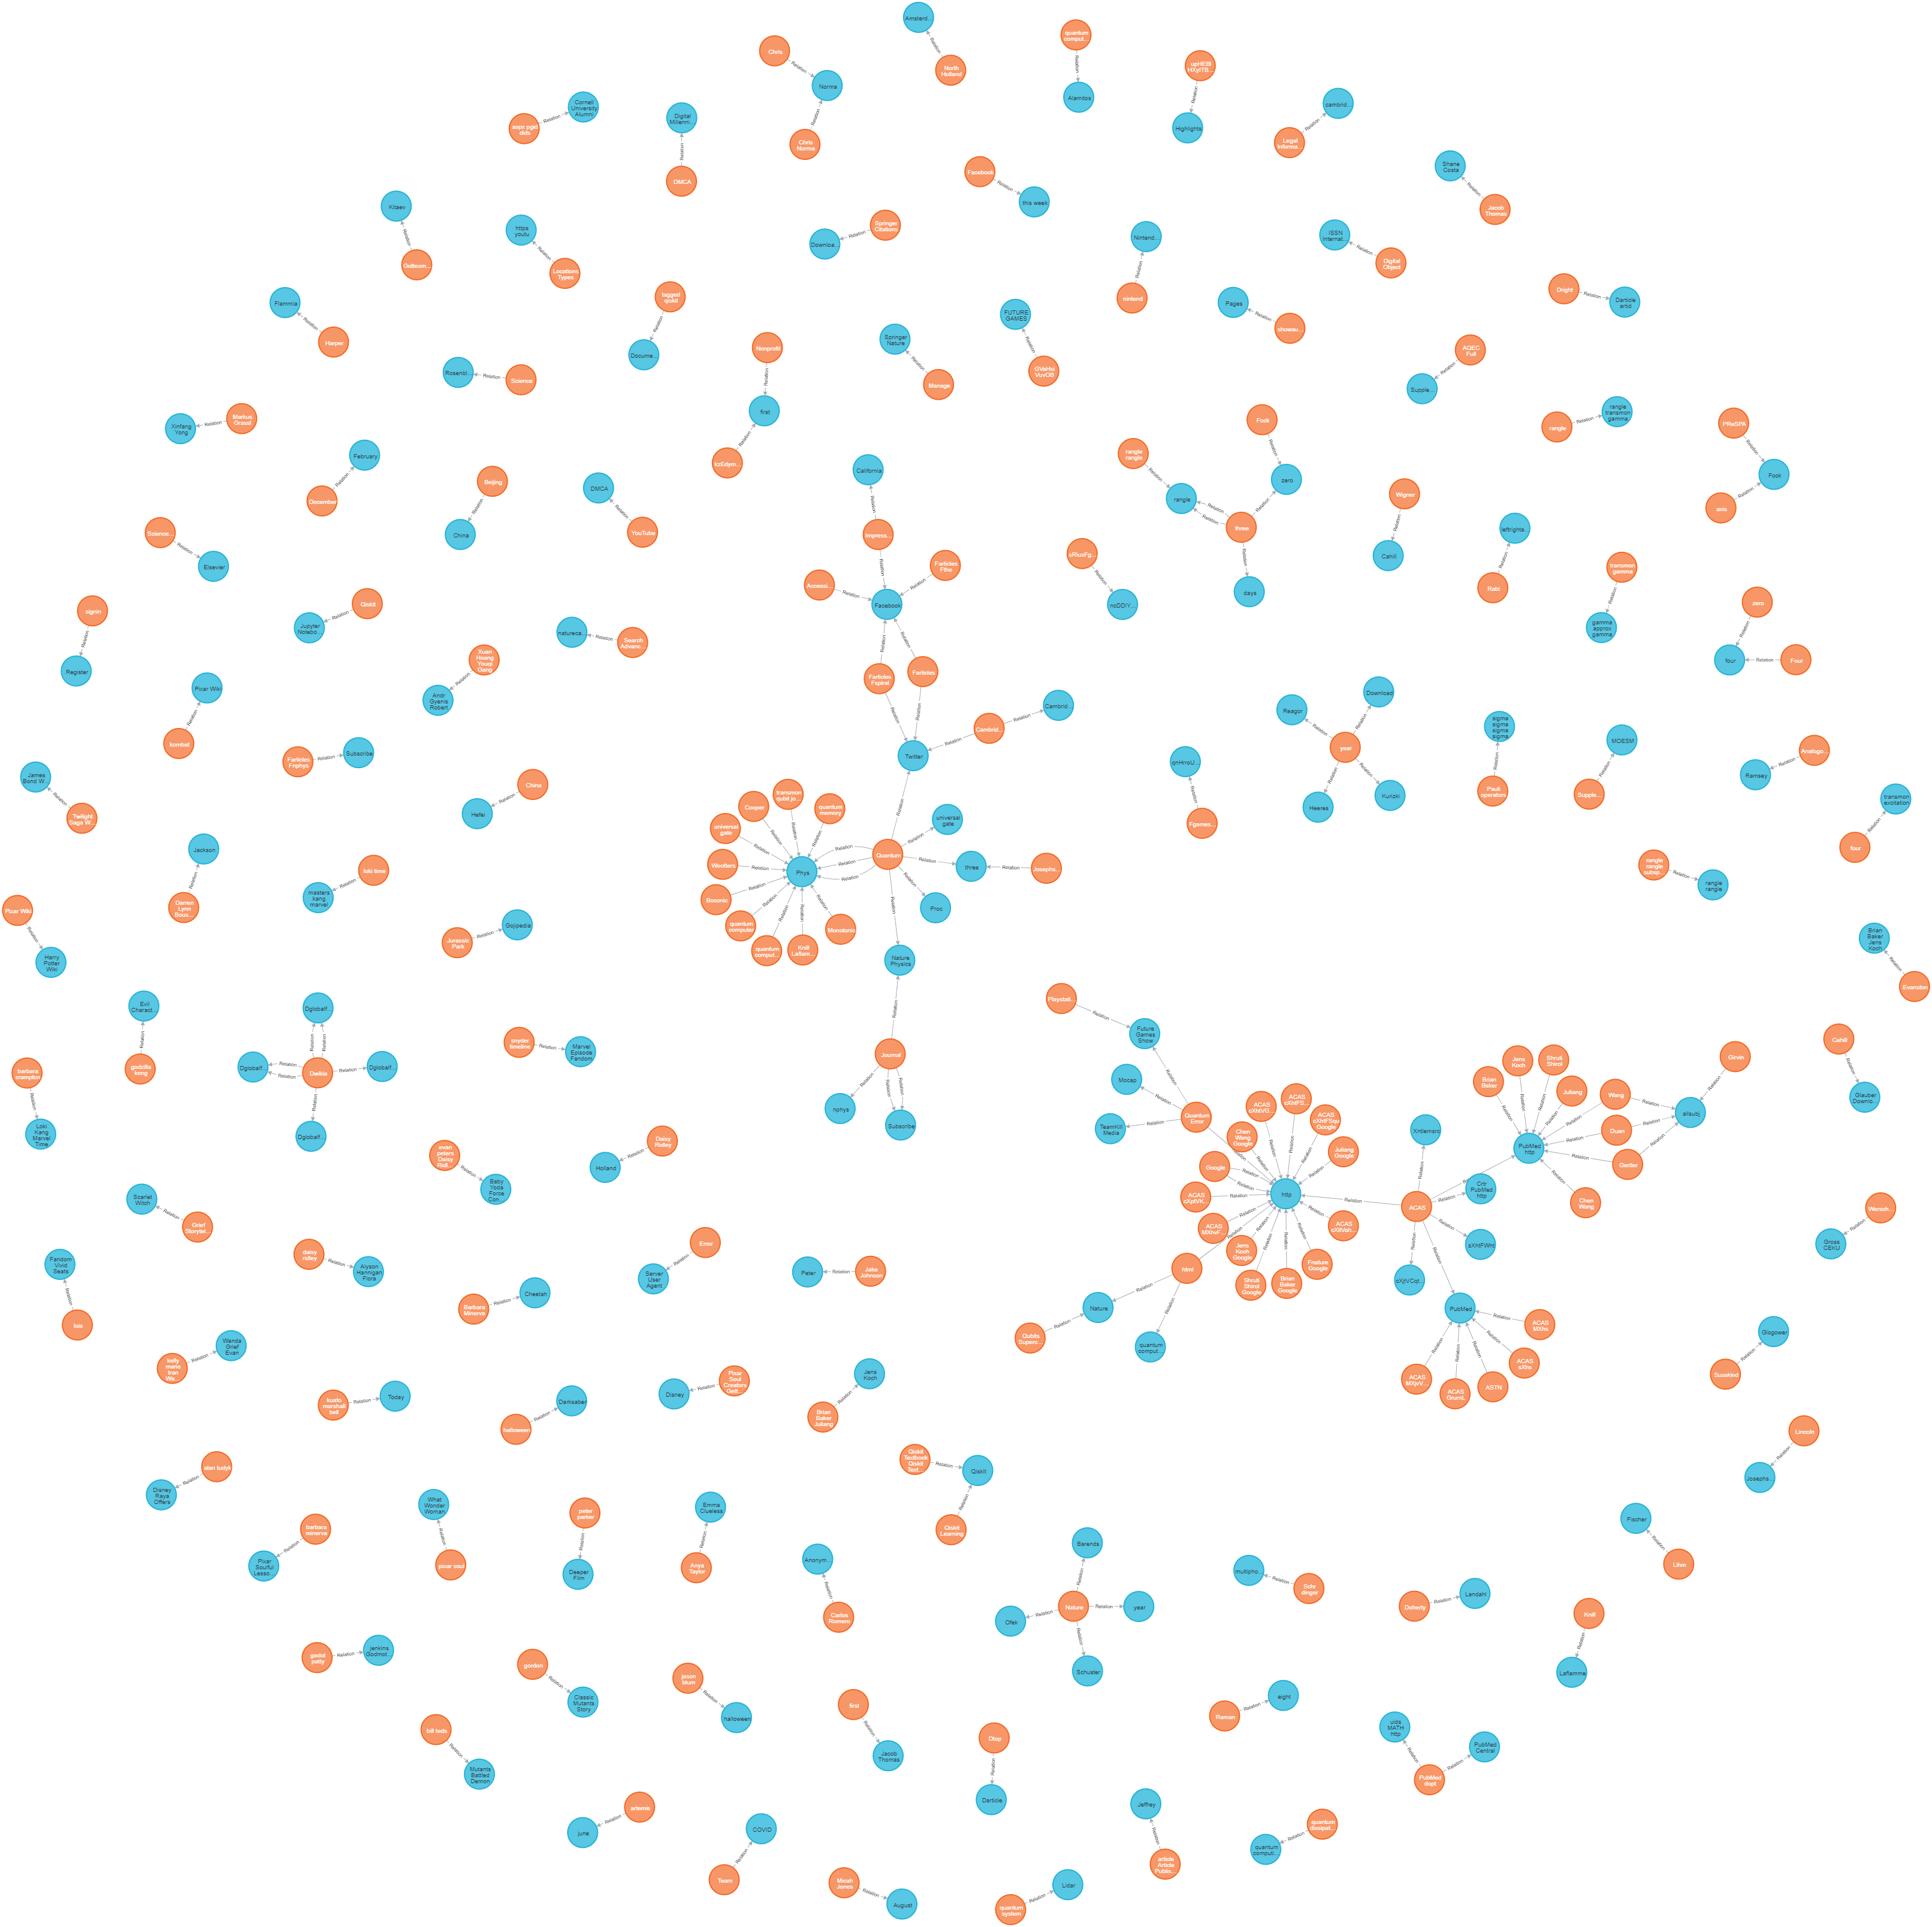

**Query the Knowledge Graph**

In [ ]:
# Number of Nodes
graph.run("""MATCH (n) RETURN COUNT(n)""").data()

[{'COUNT(n)': 1040}]

In [ ]:
# Number of Relationships
graph.run("""MATCH ()-->() RETURN COUNT(*)""").data()

[{'COUNT(*)': 748}]

In [ ]:
# List node labels
graph.run("""CALL db.labels()""").data()

[{'label': 'Subject'}, {'label': 'Object'}]

In [ ]:
# List relationship types
graph.run("""CALL db.relationshipTypes()""").data()

[{'relationshipType': 'Relation'}]

In [ ]:
# What is related, and how
graph.run("""CALL db.schema.visualization()""").data()

[{'nodes': [Node('Object', constraints=[], indexes=[], name='Object'),
   Node('Subject', constraints=[], indexes=[], name='Subject')],
  'relationships': [Relation(Node(), Node())]}]

Schema_Visualization

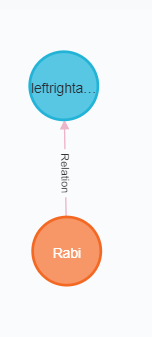

In [ ]:
graph.run("""MATCH (n)-[r]->(m) RETURN n, r, m limit 10""").data()

[{'m': Node('Object', name='Darticle'),
  'n': Node('Subject', name='Dtop'),
  'r': Relation(Node('Subject', name='Dtop'), Node('Object', name='Darticle'), name='artid')},
 {'m': Node('Object', name='Nature'),
  'n': Node('Subject', name='Qubits Superconducting'),
  'r': Relation(Node('Subject', name='Qubits Superconducting'), Node('Object', name='Nature'), name='media')},
 {'m': Node('Object', name='Nature'),
  'n': Node('Subject', name='html'),
  'r': Relation(Node('Subject', name='html'), Node('Object', name='Nature'), name='authors editorial')},
 {'m': Node('Object', name='Subscribe'),
  'n': Node('Subject', name='Journal'),
  'r': Relation(Node('Subject', name='Journal'), Node('Object', name='Subscribe'), name='Explore')},
 {'m': Node('Object', name='Subscribe'),
  'n': Node('Subject', name='Journal'),
  'r': Relation(Node('Subject', name='Journal'), Node('Object', name='Subscribe'), name='Publish with')},
 {'m': Node('Object', name='Jeffrey'),
  'n': Node('Subject', name='article